# Heatgrams

In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_target_pred(directory):
    # Extract prediction and target from all the models
    target_tuples = []
    prediction_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            target_tuples.extend([(label, array) for label, array in result_sim if 'target' in label])
            prediction_tuples.extend([(label, array) for label, array in result_sim if 'predition' in label])
    return target_tuples, prediction_tuples

In [3]:
def remove_until_underscore(s):
    parts = s.split('_')
    result = '_'.join(parts[1:])
    return result

## Compare the Euclidean distance

I need to compare evry element of the perdiction with every elelmtn of the target. I will use the Euclidean distance

In [4]:
def cosine_similarity(target_tuples, prediction_tuples):
    cosine_similarity = []
    for i in range(len(target_tuples)):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(prediction_tuples[i][0]):
            U = prediction_tuples[i][1]
            UH = U.conj().T
            U0 = target_tuples[i][1]
            U0H = U0.conj().T
            trace_UH_U0 = np.trace(np.dot(UH, U0)).real
            trace_UH_U = np.trace(np.dot(UH, U)).real
            trace_U0H_U0 = np.trace(np.dot(U0H, U0)).real
            cosine_similarity.extend([trace_UH_U0/np.sqrt(trace_UH_U*trace_U0H_U0)])
        else:
            print("Capo abbiamo un problema :(")

    labels = [t[0] for t in prediction_tuples]
    cosine_similarity_pd = pd.DataFrame({'label': labels, 'value': cosine_similarity})
    return cosine_similarity_pd

In [5]:
def euclidean_distance(z1, z2):     # Calculate the Euclidean distance
    x1, y1 = z1.real, z1.imag
    x2, y2 = z2.real, z2.imag
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2).real
    return distance

def eucli_distance_elements_matrix(target_tuples, prediction_tuples):
    eucli_distance_matrix = []
    for i in range(len(target_tuples)):
    # for i in range(1):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(prediction_tuples[i][0]):
            eucli_distance_matrix.append(euclidean_distance(target_tuples[i][1], prediction_tuples[i][1]))
        else:
            print("Capo abbiamo un problema :(")

    labels = [t[0] for t in prediction_tuples]
    eucli_distance_matrix_truple = list(zip(labels, eucli_distance_matrix))
    # eucli_distance_matrix_truple = pd.DataFrame({'label': labels, 'value': eucli_distance_matrix})
    return eucli_distance_matrix_truple

In [6]:
def take_min_mean_rep(tuples):
    # make average between all elements
    labels = [t[0] for t in tuples]
    value_average = [elem[1].mean() for elem in tuples]
    df = pd.DataFrame({'label': labels, 'value': value_average})

    # take the min rep that has the best result
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    idx = df.groupby('label_no_rep')['value'].idxmin()
    labels_with_min_value = df.loc[idx, 'label']
    filtered_min_tuples = [t for t in tuples if t[0] in labels_with_min_value.values]
    return filtered_min_tuples

In [7]:
def models_heat_mean_devstd(tuples, name_models):
    mean_models = []
    std_dev_models = []
    for name in name_models:
        filtered_arrays = [array for label, array in tuples if name in label]
        stacked_arrays = np.stack(filtered_arrays)
        # Calculate the mean and std deviation along the axis 0 (column-wise for 2D arrays)
        mean_models.append((name, np.mean(stacked_arrays, axis=0)))
        std_dev_models.append((name, np.std(stacked_arrays, axis=0)))
    return mean_models, std_dev_models

# N = 4

In [8]:
directory = '20240420_N4_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

target_tuples, prediction_tuples = extract_target_pred(directory)
# make the euclide distance elemnt by element between targets and preditions
eucli_distance_matrix_tuple = eucli_distance_elements_matrix(target_tuples, prediction_tuples)
# Make and mean of all the matrix elemnt and take the min solution between the repetitions
#  and return the tuple with the best repetition
eucli_distance_matrix_best_tuple = take_min_mean_rep(eucli_distance_matrix_tuple)
# Make the mean and std dev between the 1000 training matries
mean_models, std_dev_models = models_heat_mean_devstd(eucli_distance_matrix_best_tuple, name_models)


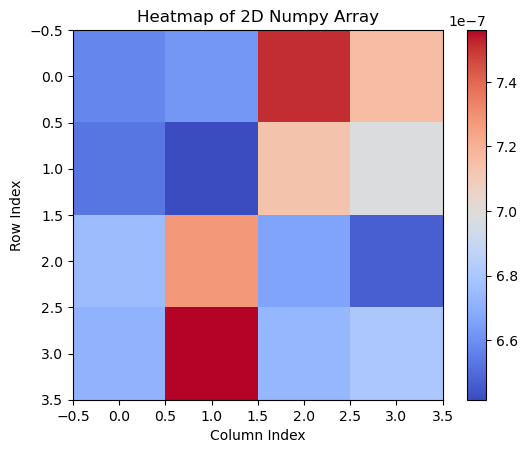

In [9]:
name = 'ClementsBellNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

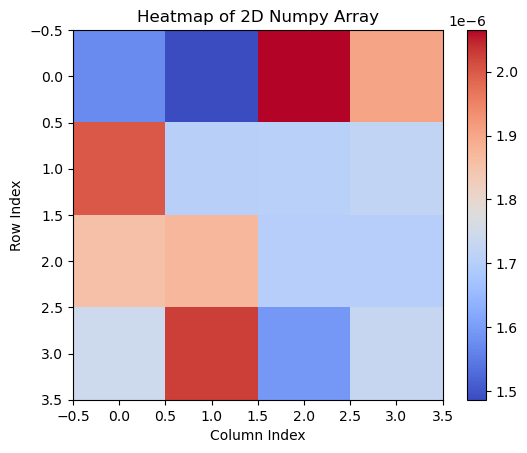

In [10]:
name = 'FldzhyanBellNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

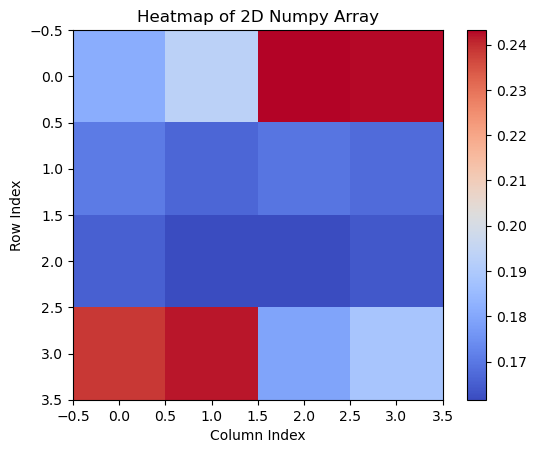

In [11]:
name = 'FldzhyanBellHalfNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

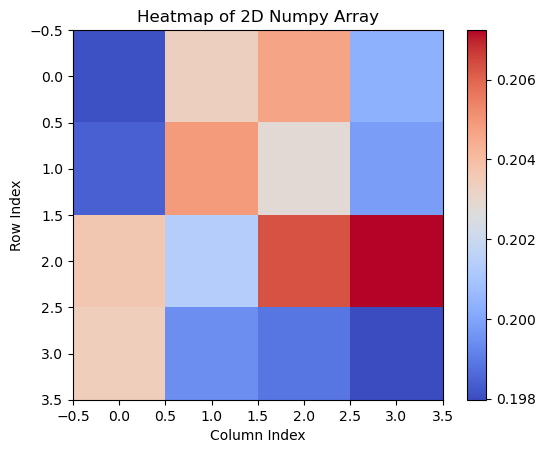

In [12]:
name = 'NEUROPULSBonus_unitaryNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

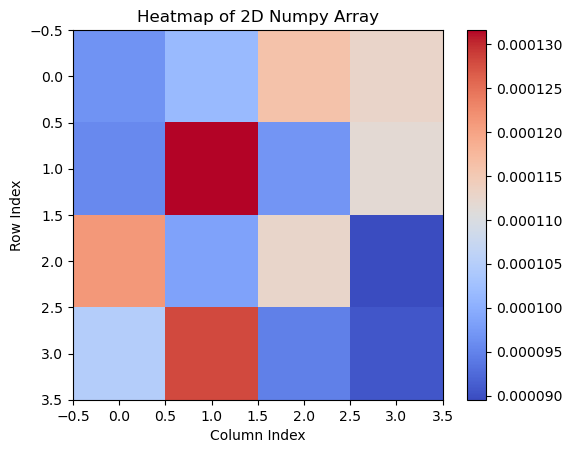

In [13]:
name = 'NEUROPULSBonus_anymatrixNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

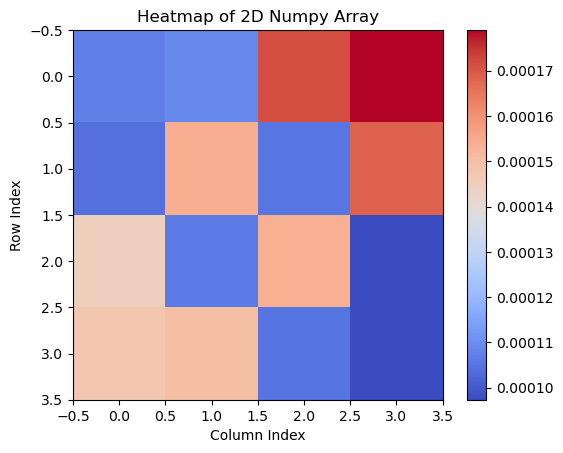

In [14]:
name = 'NEUROPULSBonus_Bell_Minht_NxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

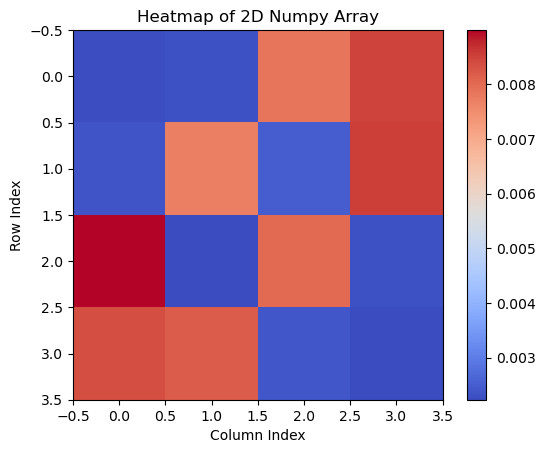

In [15]:
name = 'NEUROPULSBonus_BellNormal_NxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

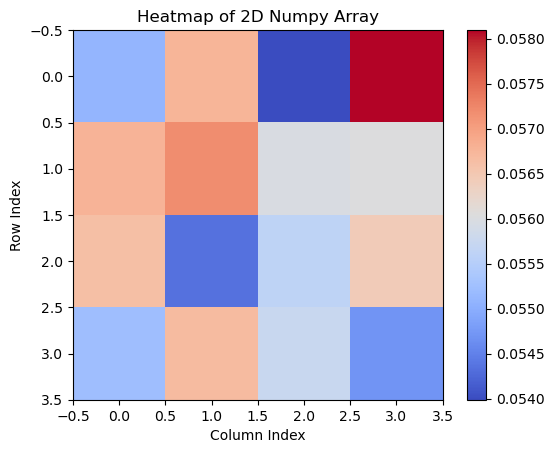

In [16]:
name = 'CB_withMZI'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

# N = 8

In [17]:
directory = '20240420_N8_HPC_simulation/'
name_models = ['ClementsBellNxN', 'FldzhyanBellNxN', 'FldzhyanBellHalfNxN', 'NEUROPULSBonus_unitaryNxN', 'NEUROPULSBonus_unitary_2long_NxN',
            'NEUROPULSBonus_anymatrixNxN', 'NEUROPULSBonus_Bell_Minht_NxN', 'NEUROPULSBonus_BellNormal_NxN',
            'CB_withMZI', 'FB_withMZI', 'FBH_withMZI', 'NPBU_withMZI',]

target_tuples, prediction_tuples = extract_target_pred(directory)
# make the euclide distance elemnt by element between targets and preditions
eucli_distance_matrix_tuple = eucli_distance_elements_matrix(target_tuples, prediction_tuples)
# Make and mean of all the matrix elemnt and take the min solution between the repetitions
#  and return the tuple with the best repetition
eucli_distance_matrix_best_tuple = take_min_mean_rep(eucli_distance_matrix_tuple)
# Make the mean and std dev between the 1000 training matries
mean_models, std_dev_models = models_heat_mean_devstd(eucli_distance_matrix_best_tuple, name_models)

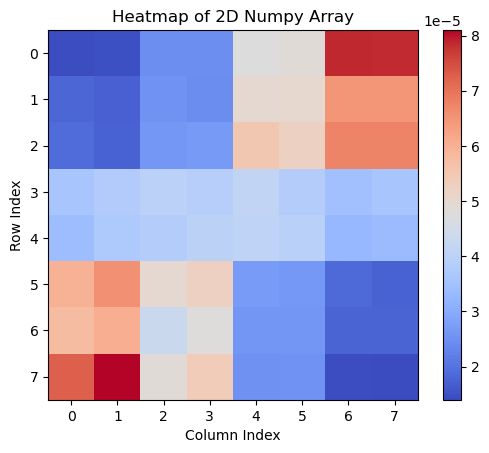

In [18]:
name = 'ClementsBellNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

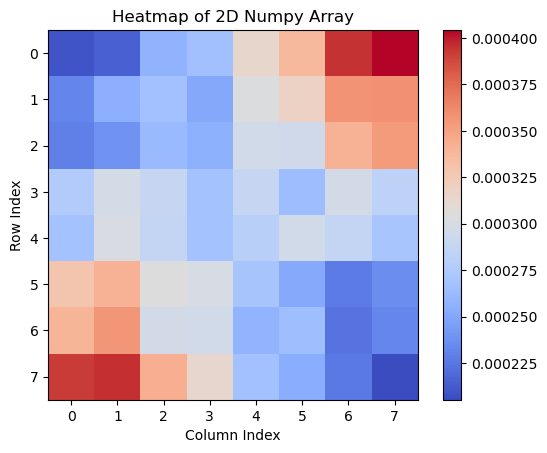

In [19]:
name = 'FldzhyanBellNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

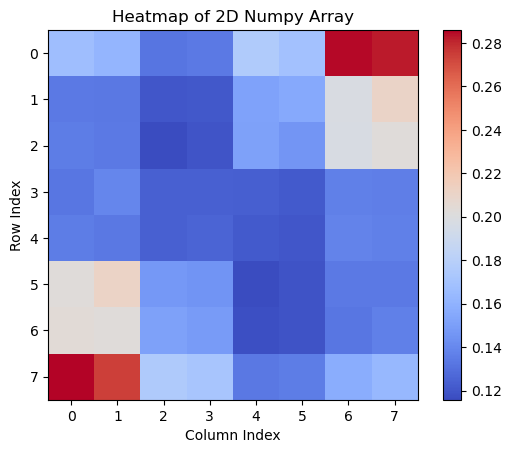

In [20]:
name = 'FldzhyanBellHalfNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

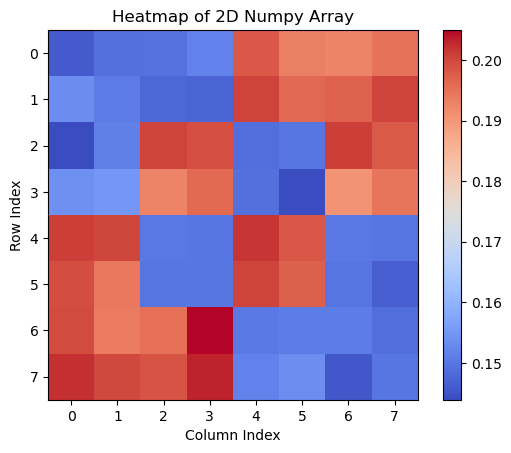

In [21]:
name = 'NEUROPULSBonus_unitaryNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

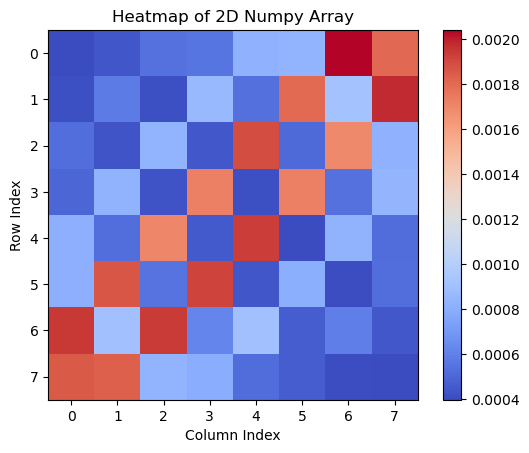

In [22]:
name = 'NEUROPULSBonus_anymatrixNxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

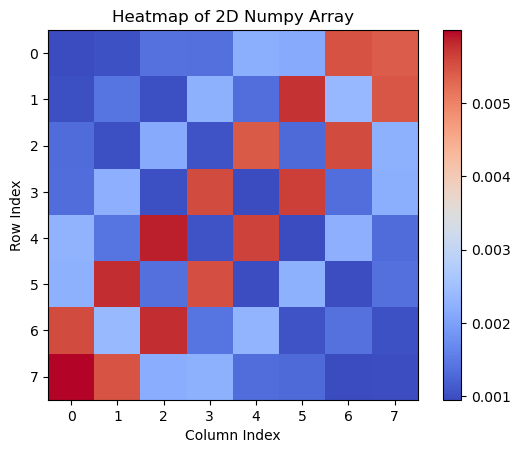

In [23]:
name = 'NEUROPULSBonus_BellNormal_NxN'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();

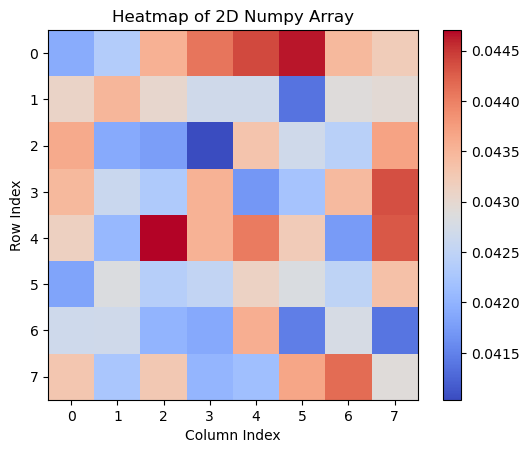

In [24]:
name = 'CB_withMZI'
data = mean_models[name_models.index(name)][1]

# Create a heatmap
plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# Add a colorbar
plt.colorbar()
# Add titles and labels (optional)
plt.title('Heatmap of 2D Numpy Array')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show();